# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.
e than 0.6.  
[2
ith a macro F1-score of more than 0.6.  


# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to create a classification model that can accurately predict the WCB’s final decision on what type of injury (Claim Injury Type) should be given to a claim. To do that, the WCB has provided labelled data with all claims assembled between
2020 and 02222 <r>. 

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>


## 1.1 Importing Libraries <a name="11-importing-libraries"></a>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kmodes import KModes
from math import ceil

from sklearn.model_selection import train_test_split
import scipy.stats as stats

from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>


In [8]:
train_data = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
train_data.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claiWCBhearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by train_data.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the train_data district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the trainWCBunknown at the start of a claim.  
`train_data WCBMulticlass variable: Decision of the train_data relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illWCBthe workplace, both of which require train_data deliberation and may be unknown at the cla`im's start.  
`Claim WCB target variable: Deliberation of the train_data relative to benefits awarded toity. 
aim, with numbering indicating severity. <br>  


## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>


#### Shape

In [12]:
train_data.shape

(593471, 33)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [15]:
train_data.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


In [17]:
train_data.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


## 1.4 Incoherencies <a name="14-incoherencies"></a>


In [19]:
train_data.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

In [20]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object     21
float64    11
int64       1
Name: count, dtype: int64

### Change in Datatypes:

**float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>
`Industry Code` <br>

**float -> object** <br>
`Agreement Reached` <br>
`OIICS Nature of Injury Description` <br>

**to object** <br>

**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>


### Change in datatypes


**Data from float to integer:**

In [24]:
train_data_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'WCIO Cause of Injury Code','WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Industry Code']

for col in train_data_float_to_int:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype('Int64')

**Data from float to object:**

In [26]:
train_data_float_to_obj = ['Agreement Reached', 'OIICS Nature of Injury Description']

for col in train_data_float_to_obj:
    train_data[col] = train_data[col].astype('object')

**Dates from object to datetime format:**

In [28]:
# Convert dates treated as objects to datetime format
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'], errors='coerce')
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'], errors='coerce')
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'], errors='coerce')
train_data['First Hearing Date'] = pd.to_datetime(train_data['First Hearing Date'], errors='coerce')
train_data['Assembly Date'] = pd.to_datetime(train_data['Assembly Date'], errors='coerce')

In [29]:
train_data.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                               int64
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

In [30]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object            18
Int64              8
datetime64[ns]     5
float64            1
int64              1
Name: count, dtype: int64

In [31]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace(-9, 9)

### Columns that should have matching number of unique values:

`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`<br>
`Industry Code`<> `Industry Code Description`<br>
`WCIO Cause of Injury Code`<> `WCIO Cause of Injury Description`<br>

Lets analyse what happened


`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`

In [34]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#there are 3 more codes than descriptions

WCIO Part Of Body Code           57
WCIO Part Of Body Description    54
dtype: int64

In [35]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
body_uniques = train_data.drop_duplicates(subset=['WCIO Part Of Body Code'])[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
body_repeats = body_uniques['WCIO Part Of Body Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
body_repeats[body_repeats > 1]

WCIO Part Of Body Description
DISC           2
SOFT TISSUE    2
SPINAL CORD    2
Name: count, dtype: int64

In [36]:
body_uniques[body_uniques['WCIO Part Of Body Description'].isin(['DISC', 'SOFT TISSUE', 'SPINAL CORD'])][['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]
#23: spinal cord
#18: soft tissue
#43: disc

,WCIO Part Of Body Code,WCIO Part Of Body Description
29,23,SPINAL CORD
41,18,SOFT TISSUE
45,25,SOFT TISSUE
113,43,DISC
151,22,DISC
2761,47,SPINAL CORD


In [37]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [38]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#now we have the same count for each

WCIO Part Of Body Code           54
WCIO Part Of Body Description    54
dtype: int64

`Industry Code`<> `Industry Code Description`<br>

In [40]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                24
Industry Code Description    20
dtype: int64

In [41]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
industry_uniques = train_data.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
industry_repeats = industry_uniques['Industry Code Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem 
industry_repeats[industry_repeats > 1]

Industry Code Description
MANUFACTURING                     3
RETAIL TRADE                      2
TRANSPORTATION AND WAREHOUSING    2
Name: count, dtype: int64

In [42]:
industry_uniques[industry_uniques['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]
#44: Retail Trade
#31 Manufacturing
#48 TRANSPORTATION AND WAREHOUSING

,Industry Code,Industry Code Description
0,44,RETAIL TRADE
16,31,MANUFACTURING
17,48,TRANSPORTATION AND WAREHOUSING
18,45,RETAIL TRADE
31,49,TRANSPORTATION AND WAREHOUSING
65,33,MANUFACTURING
149,32,MANUFACTURING


In [43]:
train_data['Industry Code'] = train_data['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [44]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                20
Industry Code Description    20
dtype: int64

`WCIO Cause of Injury Code<> WCIO Cause of Injury Description`

In [46]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           77
WCIO Cause of Injury Description    74
dtype: int64

In [47]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
cinjury_uniques = train_data.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
cinjury_repeats = cinjury_uniques['WCIO Cause of Injury Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
cinjury_repeats[cinjury_repeats > 1]

WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    3
REPETITIVE MOTION                 2
Name: count, dtype: int64

In [48]:
cinjury_uniques[cinjury_uniques['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]
#97: Repetitive Motion (replace 94)
#79: OBJECT BEING LIFTED OR HANDLED (replace 17,66)

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
1,97,REPETITIVE MOTION
2,79,OBJECT BEING LIFTED OR HANDLED
90,17,OBJECT BEING LIFTED OR HANDLED
141,66,OBJECT BEING LIFTED OR HANDLED
2953,94,REPETITIVE MOTION


In [49]:
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].replace({94:97, 17:79, 66:79})

In [50]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           74
WCIO Cause of Injury Description    74
dtype: int64

### Columns with both numbers and string as values

`Carrier Type` <br>

In [53]:
train_data['Carrier Type'].unique()
#1A. PRIVATE
#2A. SIF, -> STATE INSURANCE FUND (acc to google:stands for Subsequent Injury Fund??)
#3A. SELF PUBLIC
#4A. SELF PRIVATE
#5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
#5C. SPECIAL FUND - POI CARRIER train_data MENANDS
#5D. SPECIAL FUND - UNKNOWN
#NAN
#UNKNOWN

array(['1A. PRIVATE', nan, '2A. SIF', '4A. SELF PRIVATE',
       '3A. SELF PUBLIC', 'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN',
       '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'], dtype=object)

**Identify them by the number and discard string:** <br>
After analysing these unique values frequency, we deduct that 5A, 5C, 5D are not expressive and can all be represented by 5

In [55]:
train_data['Carrier Type'] = train_data['Carrier Type'].str[:1]
train_data['Carrier Type'].unique()

array(['1', nan, '2', '4', '3', 'U', '5'], dtype=object)

**Change datatype from object to integer after**:

In [57]:
train_data['Carrier Type'] = pd.to_numeric(train_data['Carrier Type'], errors='coerce').astype('Int64')

`Claim Injury Type`

In [59]:
train_data['Claim Injury Type'].unique()
#1. CANCELLED
#2. NON-COMP
#3. MED ONLY
#4. TEMPORARY
#5. PPD SCH LOSS
#6. PPD NSL
#7. PTD
#8. DEATH

array(['2. NON-COMP', '4. TEMPORARY', nan, '3. MED ONLY',
       '5. PPD SCH LOSS', '6. PPD NSL', '1. CANCELLED', '8. DEATH',
       '7. PTD'], dtype=object)

In [60]:
train_data['Claim Injury Type'] = train_data['Claim Injury Type'].str[:1]
train_data['Claim Injury Type'].unique()

array(['2', '4', nan, '3', '5', '6', '1', '8', '7'], dtype=object)

In [61]:
train_data['Claim Injury Type'] = pd.to_numeric(train_data['Claim Injury Type'], errors='coerce').astype('Int64')

In [62]:
train_data_copy = train_data.copy()

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>


### Numerical Data Visualization

For numerical data, we plotted an histogram showing the data distribution: <br>

this visualization is not ideal for `Average Weekly Wage`

### Categorical Data Visualization

For categorical data, we plotted a bar chart showing frequency of unique values: 

this visualization is not ideal for following attributes, that present more dense values <br>
`Zip Code` <br>
`Carrier Name` <br>

[ ] change visual for these attributes

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>


## 2.1 Missing Values <a name="21-missing-values"></a>


### `Step 1` **Disposable rows and columns**

In [71]:
train_data.shape

(593471, 33)

Check for % non-null values for each feature:

In [73]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
3,Assembly Date,100.000000,0
11,Claim Identifier,100.000000,0
32,Number of Dependents,96.723513,19445
1,Age at Injury,96.723513,19445
2,Alternative Dispute Resolution,96.723513,19445
4,Attorney/Representative,96.723513,19445
31,WCB Decision,96.723513,19445
30,Agreement Reached,96.723513,19445
21,Medical Fee Region,96.723513,19445
17,Gender,96.723513,19445


**Drop column with all null values:**

In [75]:
train_data = train_data.drop(columns = ['OIICS Nature of Injury Description'])

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [77]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but aren't relevant enough for each case
nan_columns = train_data.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((train_data[nan_columns].isnull()) | (train_data[nan_columns] == 0)).all(axis=1).sum()

19445

**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [79]:
train_data = train_data.dropna(subset = nan_columns, how = 'all')

In [80]:
train_data.shape
# We know have 574026 rows, less 19445 then before

(574026, 32)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** =1 <br>
`OIICS Nature of Injury Description` <br>
**Rows to drop** =19445 <br>
there were 14 columns with this exact number of missing values <br>

In [82]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
1,Age at Injury,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
21,Medical Fee Region,100.000000,0
17,Gender,100.000000,0
9,Carrier Name,100.000000,0


### `Step 2` **Numerical Data**

`IME-4 Count` <br>
not all claims must have this form, so value of 0 is possible <br>
There are no 0 values, so it's safe to assume misisng values =0

In [85]:
train_data['IME-4 Count'].describe()

count    132803.0
mean     3.207337
std      2.832303
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

In [86]:
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)

`First Hearing Date` <br>
not all claims must have a hearing, and metadata indicate sthat null values means no hearing was held yet <br>
The metadata suggests that this attribute can have a binary outcome.

**Turn 'First Hearing Date' into 'First Hearing', a binary outcome feature, where 0="there was no hearing" and 1="there was a hearing":**

In [89]:
train_data['First Hearing'] = train_data['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)
train_data = train_data.drop('First Hearing Date', axis=1)

`C-3 Date` <br>
this form is mandatory and must be attached in order for a claim to exist. <br>
It is known that you must file form C-3 until 2years from Accident Date. <br>

In [91]:
train_data['C-3 Date'].describe()

count                           187245
mean     2021-07-26 21:31:28.449892096
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

**So, we create a variable 'Days from Accident to Claim' to analyse the time spent since the accident:**

In [93]:
train_data_copy['Days from Accident to Claim'] = (train_data['C-3 Date'] - train_data['Accident Date']).dt.days.astype('Int64')

In [94]:
train_data_copy['Days from Accident to Claim'].describe()

count      183798.0
mean      97.444298
std      406.096844
min         -9870.0
25%            12.0
50%            27.0
75%            71.0
max         18566.0
Name: Days from Accident to Claim, dtype: Float64

In [95]:
train_data_copy['Days from Accident to Claim'].median()

27.0

Between mean or median as tendency to count days passed since the acccident we choose the median since it is more resistant to outliers. <br>
**Assuming that C-3 Date is filed 27 days after Accident Date:**

In [97]:
train_data['C-3 Date'] = train_data['C-3 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=27))

In [98]:
# doesn't change whether i fill based on original values of accident date or updated ones (bc we havent changed accident date yet

In [99]:
train_data['C-3 Date'].describe()

count                           573784
mean     2021-06-17 09:55:49.636796928
min                1961-10-03 00:00:00
25%                2020-10-26 00:00:00
50%                2021-08-08 00:00:00
75%                2022-04-29 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

`C-2 Form` <br>
this form is necessary step to complete a claim file. <br>
It is known that you must file form C23 until10 dayss from Accident Date..

In [101]:
train_data_copy['Days from Accident to C-2'] = (train_data['C-2 Date'] - train_data['Accident Date']).dt.days.astype('Int64')

In [102]:
train_data_copy['Days from Accident to C-2'].describe()

count     557346.0
mean      70.35153
std      511.63367
min        -8842.0
25%            5.0
50%           10.0
75%           27.0
max        21503.0
Name: Days from Accident to C-2, dtype: Float64

In [103]:
train_data_copy['Days from Accident to C-2'].median()

10.0

Between mean or median as tendency to count days passed since the acccident we choose the median since it is more resistant to outliers. <br>
**Assuming that C-2 Date is filed 10 days after Accident Date (max limit):**

In [105]:
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=10))

`Average Weekly Wage` <br>
This value will be filled based on Industry Code, so we will fill afterwards

In [279]:
# Calculate the mean of 'Average Weekly Wage' by Industry Code' for each row, and stored them ordinally in industry_mean_wage
industry_mean_wage = train_data.groupby('Industry Code')['Average Weekly Wage'].transform('mean')

`Birth Year`

If the Age at injury and Accident Date are known, we can calculate the birth year from a simple subtraction between the two:

In [110]:
train_data['Birth Year'] = train_data.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)


Examining `Accident Date` <> `Birth Year` <> `Age at Injury`:

In [112]:
train_data[(train_data['Accident Date'].isna()) & (train_data['Age at Injury'] == 0) & (train_data['Birth Year']!= 0)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing
370,NaT,0,N,2020-01-02,Y,0.0,1959.0,NaT,2019-12-23,STARR INDEMNITY & LIABILITY CO,1,5394068,2,BRONX,N,NYC,M,0,23,CONSTRUCTION,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,0.0,Not Work Related,6,0
396,NaT,0,N,2020-01-02,Y,0.0,1984.0,NaT,2019-12-27,LM INSURANCE CORP,1,5393794,2,ONONDAGA,N,SYRACUSE,F,0,<NA>,NaN,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,13212,0.0,Not Work Related,4,0
599,NaT,0,N,2020-01-02,Y,0.0,1967.0,NaT,2019-12-27,AMERICAN ZURICH INSURANCE CO,1,5393999,1,ALBANY,N,ALBANY,M,0,<NA>,NaN,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,12209,0.0,Not Work Related,6,0
760,NaT,0,N,2020-01-03,Y,0.0,1971.0,NaT,2019-12-23,NEW HAMPSHIRE INSURANCE CO,1,5394824,1,KINGS,N,NYC,M,0,31,MANUFACTURING,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11231,0.0,Not Work Related,1,0
1088,NaT,0,N,2020-01-03,N,0.0,1959.0,NaT,2019-12-27,COUNTY OF NASSAU,3,5394616,2,SUFFOLK,N,HAUPPAUGE,F,0,<NA>,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11701,0.0,Not Work Related,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591940,NaT,0,N,2022-12-28,Y,0.0,1963.0,2023-04-12,2022-12-23,ACE AMERICAN INSURANCE CO.,1,6162702,1,ROCKLAND,N,NYC,M,0,23,CONSTRUCTION,III,98,"CUMULATIVE, NOC",52,STRAIN OR TEAR,38,SHOULDER(S),10983,0.0,Not Work Related,5,1
592566,NaT,0,N,2022-12-29,Y,0.0,1967.0,NaT,2022-12-21,STATE INSURANCE FUND,2,6163633,1,QUEENS,N,NYC,F,0,<NA>,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11422,0.0,Not Work Related,1,0
592914,NaT,0,N,2022-12-30,Y,0.0,1961.0,2023-01-10,2022-12-27,COUNTY OF NASSAU,3,6164216,2,NASSAU,N,NYC,M,0,92,PUBLIC ADMINISTRATION,IV,52,CONTINUAL NOISE,31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),11756,0.0,Not Work Related,0,1
592978,NaT,0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1,6164933,2,KINGS,N,NYC,M,0,23,CONSTRUCTION,IV,60,"STRAIN OR INJURY BY, NOC",78,CARPAL TUNNEL SYNDROME,39,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6,0


In [113]:
train_data[(train_data['Accident Date'].isna()) & (train_data['Age at Injury'] == 0) & (train_data['Birth Year']!= 0)].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Accident Date,0,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN
Age at Injury,3361.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alternative Dispute Resolution,3361,2,N,3346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,3361,NaN,NaN,NaN,2021-06-05 21:32:36.917584128,2020-01-02 00:00:00,2020-09-03 00:00:00,2021-05-13 00:00:00,2022-03-08 00:00:00,2022-12-30 00:00:00,NaN
Attorney/Representative,3361,2,Y,2858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,3189.0,NaN,NaN,NaN,42.350605,0.0,0.0,0.0,0.0,4638.24,282.744408
Birth Year,3185.0,NaN,NaN,NaN,1967.504867,1936.0,1960.0,1965.0,1974.0,2005.0,10.712028
C-2 Date,1954,NaN,NaN,NaN,2021-07-29 06:15:06.448311040,2000-02-09 00:00:00,2020-10-22 00:00:00,2021-07-21 00:00:00,2022-05-19 00:00:00,2024-05-31 00:00:00,NaN
C-3 Date,3175,NaN,NaN,NaN,2021-05-23 11:37:32.976377856,2010-05-14 00:00:00,2020-08-23 00:00:00,2021-04-22 00:00:00,2022-02-25 00:00:00,2024-03-13 00:00:00,NaN
Carrier Name,3361,371,STATE INSURANCE FUND,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
train_data[(train_data['Age at Injury'] == 0) & (train_data['Accident Date'].notna()) & (train_data['Birth Year']!= 0)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing
4851,2019-08-11,0,N,2020-01-09,N,150.00,1901.0,2020-01-09,2019-12-27,WESCO INSURANCE COMPANY,1,5399016,3,KINGS,N,NYC,M,0,72,ACCOMMODATION AND FOOD SERVICES,IV,45,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90,MULTIPLE PHYSICAL INJURIES ONLY,90,MULTIPLE BODY PARTS (INCLUDING BODY,11219,0.0,Not Work Related,5,0
5146,2020-01-08,0,N,2020-01-10,Y,628.62,2020.0,2020-01-10,2020-02-04,A I U INSURANCE COMPANY,1,5400724,4,SUFFOLK,N,HAUPPAUGE,M,2,31,MANUFACTURING,IV,70,"STRIKING AGAINST OR STEPPING ON, NOC",13,CRUSHING,<NA>,NaN,11720,1.0,Not Work Related,6,1
7655,2020-01-12,0,N,2020-01-14,N,528.71,1901.0,2020-01-14,2020-02-08,AMTRUST INS CO OF KANSAS INC,1,5401957,4,ST. LAWRENCE,N,ALBANY,M,0,31,MANUFACTURING,I,19,"CUT, PUNCTURE, SCRAPE, NOC",40,LACERATION,35,HAND,13662,0.0,Not Work Related,5,0
9874,2020-01-06,0,N,2020-01-17,N,0.00,1901.0,2020-01-17,2020-02-02,INDEMNITY INS. OF N AMERICA,1,5406866,2,ERIE,N,BUFFALO,F,0,54,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",I,31,"FALL, SLIP OR TRIP, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",53,KNEE,14150,0.0,Not Work Related,0,0
11399,2019-12-13,0,N,2020-01-21,Y,567.00,2019.0,2020-01-21,2020-01-28,ZURICH AMERICAN INSURANCE CO,1,5407811,4,DELAWARE,N,BINGHAMTON,F,1,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,95,"RUBBED OR ABRADED, NOC",36,INFECTION,<NA>,NaN,38583,1.0,Not Work Related,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587193,2022-09-01,0,N,2022-12-19,N,0.00,2022.0,2022-09-11,2022-12-14,HEALTH & HOSPITAL CORP.,3,6156786,2,BRONX,N,NYC,M,0,<NA>,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,10457,0.0,Not Work Related,5,0
587577,2022-11-10,0,N,2022-12-19,Y,0.00,2022.0,2022-11-20,2022-12-09,STATE INSURANCE FUND,2,6157005,1,ROCKLAND,N,NYC,M,0,<NA>,NaN,III,<NA>,NaN,<NA>,NaN,<NA>,NaN,10977,0.0,Not Work Related,5,0
587674,2022-12-15,0,N,2022-12-20,N,0.00,2022.0,2022-12-20,2023-01-11,BERKSHIRE HATHAWAY HOMESTATE,1,6158887,1,KINGS,N,NYC,M,0,48,TRANSPORTATION AND WAREHOUSING,IV,98,"CUMULATIVE, NOC",72,LOSS OF HEARING,13,EAR(S),11228,0.0,Not Work Related,6,0
589641,2022-12-03,0,N,2022-12-22,N,0.00,1903.0,2022-12-22,2022-12-30,SEQUOIA INSURANCE COMPANY,1,6159390,2,SUFFOLK,N,HAUPPAUGE,M,0,72,ACCOMMODATION AND FOOD SERVICES,IV,1,CHEMICALS,90,MULTIPLE PHYSICAL INJURIES ONLY,66,NO PHYSICAL INJURY,11763,0.0,Not Work Related,3,0


In [115]:
train_data[(train_data['Age at Injury'] == 0) & (train_data['Accident Date'].notna()) & (train_data['Birth Year']!= 0)].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Accident Date,177,NaN,NaN,NaN,2019-09-28 04:20:20.338983168,1973-01-15 00:00:00,2020-03-23 00:00:00,2021-04-19 00:00:00,2022-02-05 00:00:00,2022-12-15 00:00:00,NaN
Age at Injury,177.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alternative Dispute Resolution,177,1,N,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,177,NaN,NaN,NaN,2021-07-03 06:30:30.508474624,2020-01-09 00:00:00,2020-09-29 00:00:00,2021-07-21 00:00:00,2022-04-19 00:00:00,2022-12-30 00:00:00,NaN
Attorney/Representative,177,2,N,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,169.0,NaN,NaN,NaN,124.327101,0.0,0.0,0.0,0.0,1454.63,300.951159
Birth Year,177.0,NaN,NaN,NaN,1956.734463,1900.0,1902.0,1903.0,2020.0,2022.0,58.132026
C-2 Date,177,NaN,NaN,NaN,2020-11-25 14:38:38.644067840,1989-10-08 00:00:00,2020-06-12 00:00:00,2021-07-02 00:00:00,2022-04-14 00:00:00,2022-12-30 00:00:00,NaN
C-3 Date,177,NaN,NaN,NaN,2019-11-04 07:27:27.457627136,1973-02-11 00:00:00,2020-05-29 00:00:00,2021-05-17 00:00:00,2022-03-15 00:00:00,2023-01-11 00:00:00,NaN
Carrier Name,177,52,AMTRUST INSURANCE COMPANY,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
train_data[(train_data['Birth Year'].isna()) & (train_data['Accident Date'].isna())].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Accident Date,0,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN
Age at Injury,176.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alternative Dispute Resolution,176,2,N,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,176,NaN,NaN,NaN,2021-06-03 10:05:27.272727296,2020-01-06 00:00:00,2020-08-24 12:00:00,2021-04-29 12:00:00,2022-04-11 18:00:00,2022-12-13 00:00:00,NaN
Attorney/Representative,176,2,Y,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,168.0,NaN,NaN,NaN,23.793095,0.0,0.0,0.0,0.0,2307.63,193.000002
Birth Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-2 Date,97,NaN,NaN,NaN,2021-07-10 22:45:46.391752704,2020-01-30 00:00:00,2020-08-26 00:00:00,2021-04-27 00:00:00,2022-06-11 00:00:00,2024-04-12 00:00:00,NaN
C-3 Date,169,NaN,NaN,NaN,2021-05-07 11:38:41.893491200,2010-05-14 00:00:00,2020-08-17 00:00:00,2021-04-21 00:00:00,2022-04-25 00:00:00,2024-03-13 00:00:00,NaN
Carrier Name,176,73,STATE INSURANCE FUND,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
train_data[(train_data['Age at Injury'] == 0) & (train_data['Accident Date'].notna()) & (train_data['Birth Year']!= 0)]['Birth Year'].unique()

array([1901., 2020., 2019., 2018., 1900., 1973., 2017., 1984., 2011.,
       1975., 1999., 2008., 2009., 2021., 1902., 1996., 2022., 1989.,
       1903.])

all 3689 where there are missing values for `Accident Date`, Age at Injury = 0, of which: <br>

- 3361 rows have a birth year - between 1936 and 2005 (19 to 88yr -2024) <br>

for cases when there is a birth year and a accident date (177): <br>
- birth year is strange values 50% born until 1903 and 25% born after 2022 <br>
- not strange 1973, 1984, 1975, 1999, 1996, 1996 <br>

all 176 missing values for `Birth Year` have missing values for accident date and show age at injury=0, of which: <br>
- Alternative Dispute Resolution is always N except for one
- most have no avg weekly wage <br>

We will later decide how to treat such values.

In [119]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
16,Gender,100.000000,0
12,Claim Injury Type,100.000000,0
30,Number of Dependents,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
20,Medical Fee Region,100.000000,0
17,IME-4 Count,100.000000,0
1,Age at Injury,100.000000,0
15,District Name,100.000000,0
14,COVID-19 Indicator,100.000000,0


In [121]:
train_data['First Hearing'] = pd.to_numeric(train_data['First Hearing'].astype('Int64'), errors='coerce')
train_data['Birth Year'] = pd.to_numeric(train_data['Birth Year'].astype('Int64'), errors='coerce')

### Numeric Data summary:
- all missing values were treated, except Avg Weekly Wage that will be treated after cat_data <br>
- missing values for Birth Year(176), C-3 Date(242), C-2 Date (1569) all derive from Accident Date's missing values (3689), which will be treated once we treat outliers 

- First Hearing Date missing values were filled by converting attribute into binary outcome
- Birth Year missing values were filled from calculating difference between age at Injury and Accident Date
- IME-4 Count was filled with 0


### `Step 3` Categorical Data

### Mode 

We want to analyse which method is best for categorical data with missing values: <br>

`Zip Code`<br>
`Industry Code`<> `Industry Code Description`<br>
`WCIO Cause of Injury Code`<> `WCIO Cause of Injury Description`<br>
`WCIO Nature of Injury Code`<> `WCIO Nature of Injury Description`<br>
`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`<br>

**Mode** Imputing with Mode is a straightforward method focused on filling missing values in a single categorical variable based on its most common value. <br>
**K-Modes Clustering** is a more sophisticated approach that organizes the data into clusters based on multiple categorical features, allowing for a richer understanding of the data's structure, which can indirectly inform how to impute missing values or handle categorical data.

In [125]:
columns_to_check = ['Industry Code Description', 'Industry Code',
 'WCIO Cause of Injury Description', 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Description', 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Description', 'WCIO Part Of Body Code', 'Zip Code', 'Carrier Type']


**Mode**

In [127]:
def mode_stats(train_data, columns_to_check):
    # List to store results
    mode_results = []

    # Iterate through each specified column
    for column in columns_to_check:
        # Calculate the mode
        mode_value = train_data[column].mode().iloc[0] if not train_data[column].mode().empty else None
        
        # Calculate frequency of the mode
        frequency = (train_data[column] == mode_value).sum()
        
        # Calculate counts for non-null, null, unique, and non-mode entries
        non_null_count = train_data[column].notna().sum()
        null_count = train_data[column].isna().sum()
        total_unique = train_data[column].nunique(dropna=True)
        non_mode_count = non_null_count - frequency
        
        # Calculate percentages
        percentage = (frequency / non_null_count * 100) if non_null_count > 0 else 0
        percentage_rows = (null_count / len(train_data) * 100)
        
        # Calculate mode ratio
        ratio = frequency / (non_mode_count + total_unique) if non_mode_count > 0 else float('inf')
        
        # Append results to the list
        mode_results.append({
            'Column': column,
            'Mode': mode_value,
            'Frequency': frequency,
            'Frequency %': f"{percentage:.2f}%",
            'Unique Count': total_unique,
            'Ratio': round(ratio, 4),
            'Rows to fill': null_count,
            'to fill %': percentage_rows,
        })
    
    # Convert the list to a DataFrame
    mode = pd.DataFrame(mode_results)
    mode.set_index('Column', inplace=True)
    
    return mode

In [281]:
mode = mode_stats(train_data, columns_to_check)
mode

,Mode,Frequency,Frequency %,Unique Count,Ratio,Rows to fill,to fill %
Column,,,,,,,
Industry Code Description,HEALTH CARE AND SOCIAL ASSISTANCE,123064,21.58%,20,0.2751,0,0.0
Industry Code,62,123064,21.58%,20,0.2751,0,0.0
WCIO Cause of Injury Description,LIFTING,46557,8.16%,75,0.0889,0,0.0
WCIO Cause of Injury Code,56,46557,8.16%,75,0.0889,0,0.0
WCIO Nature of Injury Description,STRAIN OR TEAR,167015,29.28%,56,0.4140,0,0.0
WCIO Nature of Injury Code,52,167015,29.28%,56,0.4140,0,0.0
WCIO Part Of Body Description,LOWER BACK AREA,51737,9.07%,55,0.0998,0,0.0
WCIO Part Of Body Code,42,51737,9.07%,55,0.0998,0,0.0
Zip Code,Unknown,28456,4.99%,8265,0.0517,0,0.0


In [129]:
for column in columns_to_check:
    if mode.loc[column, 'Ratio'] > 0.25:
        train_data[column] = train_data[column].fillna(mode.loc[column, 'Mode'])
# Industry Code Description
# Industry Code
# WCIO Nature of Injury Description	
# WCIO Nature of Injury Code

### Remaining Missing Values

`Average Weekly Wage`

In [132]:
train_data['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [133]:
train_data.groupby('Industry Code').agg({'Average Weekly Wage': ['mean', 'median']})

Average Weekly Wage       
                             mean median
Industry Code                           
11                     362.952552    0.0
21                     532.620422    0.0
22                    1060.749474    0.0
23                     754.081590  360.0
31                     419.823626    0.0
42                     479.811013    0.0
44                     240.604267    0.0
48                     618.463594    0.0
51                    1003.587962    0.0
52                     375.010607    0.0
53                     481.980402    0.0
54                     287.251633    0.0
55                     319.061183    0.0
56                     379.521924    0.0
61                     282.874239    0.0
62                     417.078580    0.0
71                     353.005339    0.0
72                     228.008561    0.0
81                     353.898755    0.0
92                     829.673856    0.0

In [134]:
#  Calculate the mean of 'Average Weekly Wage' by Industry Code' for each row, and stored them ordinally in industry_mean_wage
industry_mean_wage = train_data.groupby('Industry Code')['Average Weekly Wage'].transform('mean')

**Fill Avg Weekly Wage with average per Industry:**

In [136]:
train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].fillna(industry_mean_wage)
#same avg as if it was calculated before filling iindustry na

In [137]:
for column in columns_to_check:
    if train_data[column].isna().any():  # Check if there are any NaNs
        if train_data[column].dtype == 'object':  # Check if the column is of object type
            train_data[column] = train_data[column].fillna('Unknown')
        else:  # For numeric columns
            train_data[column] = train_data[column].fillna(0)

### Categorical data summary:
- missing values with ratio>0,25 were replaced with mode: <br>
    - Industry Code Description, Industry Code <br>
    - WCIO Nature of Injury Description, WCIO Nature of Injury Code <br>
    - Carrier Type
    
We tested filling missing values of:
- Zip Code with mode in each County of Injury; <br>
- remaining code-description pairs with mode in each Industry Code, <br>

but the relative frequency wasn't representative enough.

So, for now, we fill with 'Unknown' or '00' - **no more categorical data missing** <br>

In [139]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
16,Gender,100.000000,0
1,Age at Injury,100.000000,0
30,Number of Dependents,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
27,Zip Code,100.000000,0
26,WCIO Part Of Body Description,100.000000,0
25,WCIO Part Of Body Code,100.000000,0
24,WCIO Nature of Injury Description,100.000000,0
23,WCIO Nature of Injury Code,100.000000,0


## 2.2 Duplicates <a name="22-duplicates"></a>


In [141]:
train_data.duplicated().sum()
#There is none to drop

0

In [142]:
duplicate_rows = train_data.duplicated()

# If you want to return the entire DataFrame with only the duplicate rows:
duplicate_rows_df = train_data[duplicate_rows]

## 2.3 Outliers <a name="23-outliers"></a>


**Missing values**
- missing values for Birth Year(176), C-3 Date(242), C-2 Date (1569) all derive from Accident Date's missing values (3689), which will be treated once we treat outliers <br>

all 3689 where there are missing values for `Accident Date`, Age at Injury = 0, of which: <br>

- 3361 rows have a birth year - between 1936 and 2005 (19 to 88yr -2024) <br>

for cases when there is a birth year and a accident date (177): <br>
- birth year is strange values 50% born until 1903 and 25% born after 2022 <br>
- not strange 1973, 1984, 1975, 1999, 1996, 1996 <br>

all 176 missing values for `Birth Year` have missing values for accident date and show age at injury=0, of which: <br>
- Alternative Dispute Resolution is always N except for one
- most have no avg weekly wage <br>

We will later decide how to treat such values.

In [146]:
train_data[(train_data['Accident Date'].isna()) & (train_data['Age at Injury'] == 0)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing
370,NaT,0,N,2020-01-02,Y,0.0,1959,NaT,2019-12-23,STARR INDEMNITY & LIABILITY CO,1,5394068,2,BRONX,N,NYC,M,0,23,CONSTRUCTION,IV,0,Unknown,52,STRAIN OR TEAR,0,Unknown,Unknown,0.0,Not Work Related,6,0
396,NaT,0,N,2020-01-02,Y,0.0,1984,NaT,2019-12-27,LM INSURANCE CORP,1,5393794,2,ONONDAGA,N,SYRACUSE,F,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,II,0,Unknown,52,STRAIN OR TEAR,0,Unknown,13212,0.0,Not Work Related,4,0
486,NaT,0,N,2020-01-02,Y,0.0,0,2021-03-26,2019-12-23,"CNY OTHER THAN ED, HED WATER",3,5394023,2,NEW YORK,N,NYC,M,0,92,PUBLIC ADMINISTRATION,UK,90,OTHER THAN PHYSICAL CAUSE OF INJURY,31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),34997,0.0,Not Work Related,2,1
599,NaT,0,N,2020-01-02,Y,0.0,1967,NaT,2019-12-27,AMERICAN ZURICH INSURANCE CO,1,5393999,1,ALBANY,N,ALBANY,M,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,II,0,Unknown,52,STRAIN OR TEAR,0,Unknown,12209,0.0,Not Work Related,6,0
760,NaT,0,N,2020-01-03,Y,0.0,1971,NaT,2019-12-23,NEW HAMPSHIRE INSURANCE CO,1,5394824,1,KINGS,N,NYC,M,0,31,MANUFACTURING,IV,0,Unknown,52,STRAIN OR TEAR,0,Unknown,11231,0.0,Not Work Related,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592566,NaT,0,N,2022-12-29,Y,0.0,1967,NaT,2022-12-21,STATE INSURANCE FUND,2,6163633,1,QUEENS,N,NYC,F,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,0,Unknown,52,STRAIN OR TEAR,0,Unknown,11422,0.0,Not Work Related,1,0
592914,NaT,0,N,2022-12-30,Y,0.0,1961,2023-01-10,2022-12-27,COUNTY OF NASSAU,3,6164216,2,NASSAU,N,NYC,M,0,92,PUBLIC ADMINISTRATION,IV,52,CONTINUAL NOISE,31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),11756,0.0,Not Work Related,0,1
592964,NaT,0,N,2022-12-30,Y,0.0,0,2023-01-10,2022-12-28,NYC TRANSIT AUTHORITY,3,6164179,2,SUFFOLK,N,HAUPPAUGE,M,0,48,TRANSPORTATION AND WAREHOUSING,UK,99,"OTHER - MISCELLANEOUS, NOC",78,CARPAL TUNNEL SYNDROME,9,MULTIPLE,22473,0.0,Not Work Related,3,0
592978,NaT,0,N,2022-12-30,Y,0.0,1972,2023-01-20,2022-12-22,LM INSURANCE CORP,1,6164933,2,KINGS,N,NYC,M,0,23,CONSTRUCTION,IV,60,"STRAIN OR INJURY BY, NOC",78,CARPAL TUNNEL SYNDROME,39,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6,0


In [147]:
accident_outliers = train_data[(train_data['Accident Date'].isna()) & (train_data['Age at Injury'] == 0)]
train_data = train_data.drop(accident_outliers.index)

In [148]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.0,0
1,Age at Injury,100.0,0
30,Number of Dependents,100.0,0
29,WCB Decision,100.0,0
28,Agreement Reached,100.0,0
27,Zip Code,100.0,0
26,WCIO Part Of Body Description,100.0,0
25,WCIO Part Of Body Code,100.0,0
24,WCIO Nature of Injury Description,100.0,0
23,WCIO Nature of Injury Code,100.0,0


### Outliers Summary:
For now, we only treated outliers that will solve missing data
- there is no more missing values and we removed outliers of age=0 for rows where there was no Accident Date

## 2.4 Categorical Data <a name="24-categorical-data"></a>


#### Notes
`WCB Decision` is always 'not work related' <br>
`Gender` returns M, F, Y, U -> Y=Binary and U=Unknown <- hidden missing values <br>
`Alternative Dispute Resolution` U <- hidden missing values <br>
`Attorney/Representative` , `COVID-19 Indicator` and `WCB Decision` could be binary <br>
`Medical Fee Region` could be represented by numbers instead of strings 


In [152]:
train_data.describe(include=['object', 'category']).T

,count,unique,top,freq
Alternative Dispute Resolution,570337,3,N,567740
Attorney/Representative,570337,2,N,391704
Carrier Name,570337,2043,STATE INSURANCE FUND,110566
County of Injury,570337,63,SUFFOLK,59983
COVID-19 Indicator,570337,2,N,542816
District Name,570337,8,NYC,268681
Gender,570337,4,M,332620
Industry Code Description,570337,20,HEALTH CARE AND SOCIAL ASSISTANCE,123064
Medical Fee Region,570337,5,IV,264051
WCIO Cause of Injury Description,570337,75,LIFTING,46557


In [153]:
train_data['Gender'].value_counts()

Gender
M    332620
F    232962
U      4710
X        45
Name: count, dtype: int64

### Hidden missing values
`Gender` <> `Alternative Dispute Resolution` <br>

Approach for values 'U': 
- replace with 'Unknown' to be conforming with all other attributes with other categorical data
- replace with nan to fill with mode

**Let's replace 'U' with missing values and apply mode_stats function, to examine if mode frequency meets criteria:**

In [157]:
hidden_na = ['Alternative Dispute Resolution', 'Gender']
train_data[hidden_na] = train_data[hidden_na].replace('U', np.nan)
train_data.isna().sum()

Accident Date                           0
Age at Injury                           0
Alternative Dispute Resolution          5
Assembly Date                           0
Attorney/Representative                 0
Average Weekly Wage                     0
Birth Year                              0
C-2 Date                                0
C-3 Date                                0
Carrier Name                            0
Carrier Type                            0
Claim Identifier                        0
Claim Injury Type                       0
County of Injury                        0
COVID-19 Indicator                      0
District Name                           0
Gender                               4710
IME-4 Count                             0
Industry Code                           0
Industry Code Description               0
Medical Fee Region                      0
WCIO Cause of Injury Code               0
WCIO Cause of Injury Description        0
WCIO Nature of Injury Code        

In [158]:
mode_hidden_na = mode_stats(train_data, hidden_na)
mode_hidden_na

,Mode,Frequency,Frequency %,Unique Count,Ratio,Rows to fill,to fill %
Column,,,,,,,
Alternative Dispute Resolution,N,567740,99.55%,2,218.8666,5,0.000877
Gender,M,332620,58.81%,3,1.4275,4710,0.825828


**The mode is very frequent, so we can confidently replace 'U' with mode:**

In [160]:
train_data[hidden_na] =train_data[hidden_na].fillna(mode_hidden_na.loc[hidden_na, 'Mode'])

**Re-examining unique values of attributed treated:**

In [283]:
train_data['Gender'].value_counts()


Gender
1    570337
Name: count, dtype: Int64

In [290]:
unique = train_data[hidden_na].apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Alternative Dispute Resolution    [0, 1]
Gender                               [1]
dtype: object

### Summary of Categorical Data

Treated missing values for: <br>
`Alternative Dispute Resolution` <br>
`Gender` <br>

can become binary: <br>
`Attorney/Representative` <br>
`COVID-19 Indicator` <br>
`WCB Decision` <br>
`Alternative Dispute Resolution`  <br>
`Gender` - there are 45 non binary, which could be interpreted as 0 - not male

could be represented by numbers instead of strings : <br>
`Medical Fee Region` <br>


In [336]:
unique = train_data.select_dtypes(include='object').apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Carrier Name                         [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN INSURANCE CO, INDEMNITY INSURANCE CO OF, STATE INSU...
County of Injury                     [ST. LAWRENCE, WYOMING, ORANGE, DUTCHESS, SUFFOLK, ONONDAGA, RICHMOND, MONROE, KINGS, NEW YORK, ...
District Name                                              [SYRACUSE, ROCHESTER, ALBANY, HAUPPAUGE, NYC, BUFFALO, BINGHAMTON, STATEWIDE]
Industry Code Description            [RETAIL TRADE, CONSTRUCTION, ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT, HEALT...
WCIO Cause of Injury Description     [FROM LIQUID OR GREASE SPILLS, REPETITIVE MOTION, OBJECT BEING LIFTED OR HANDLED, HAND TOOL, UTE...
WCIO Nature of Injury Description    [CONTUSION, SPRAIN OR TEAR, CONCUSSION, PUNCTURE, LACERATION, ALL OTHER OCCUPATIONAL DISEASE INJ...
WCIO Part Of Body Description        [BUTTOCKS, SHOULDER(S), MULTIPLE HEAD INJURY, FINGER(S), LUNGS, EYE(S), ANKLE, KNEE, THUMB, LOWE...
Zip Code                             [136

## 2.6 Feature Engineering <a name="26-feature-engineering"></a>


**Count the days passed between:** <br>
Accident and assembly date <br>
Assembly date and first hearing

add features made on copy of dataset into dataset?

In [166]:
train_data_copy['Days from Accident to Assembly'] = (train_data['Assembly Date'] - train_data['Accident Date']).dt.days.astype('Int64')
train_data_copy['Days from Accident to First Hearing'] = (train_data_copy['First Hearing Date'] - train_data['Accident Date']).dt.days.astype('Int64')

**Turn Alternative Dispute Resolution, Attorney/Representative' and 'COVID-19 Indicator' into a binary outcome feature, where Y=1 and N=0:**

In [168]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
train_data[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = train_data[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

**Turn WCB Decision into binary, where 0=Not Work Related and 1=Work Related:**

In [170]:
train_data['WCB Decision'] = train_data['WCB Decision'].apply(lambda x: 0 if x == 'Not Work Related' else 1)

**Turn Gender into binary, where 0=not male and 1=Male:**

In [172]:
train_data['Gender'] = train_data['Gender'].apply(lambda x: 1 if x == 'M' else 1)

**Turn Medical Fee Region into numeric:**

In [174]:
train_data['Medical Fee Region'] = train_data['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'UK':5, 'III':3})

**Make sure to change datatype, since now it's a numeric:**

In [177]:
obj_to_number = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator','Medical Fee Region','WCB Decision', 'Gender']

for column in obj_to_number:
    train_data[column] = pd.to_numeric(train_data[column], errors='coerce').astype('Int64')

#### Test column for index:

`Claim Identifier` <br>
[x] Returns unique values and there is one identifying value for each row/case <br>
[x] This column doesn't add any relevant information about each case/row

In [180]:
#Check which unique values there are for this column and store as variable
id = train_data['Claim Identifier'].nunique()

In [181]:
#count all unique values and see if its the same number as total rows, meaning, there is one unique value for each case
id == len(train_data)

True

**Passed testing. Set 'Claim Identifier' as index:**

In [183]:
train_data = train_data.set_index('Claim Identifier')

### Dummies for categorical Data:

## 2.7 Multivariate Relationships <a name="27-multivariate-relationships"></a>


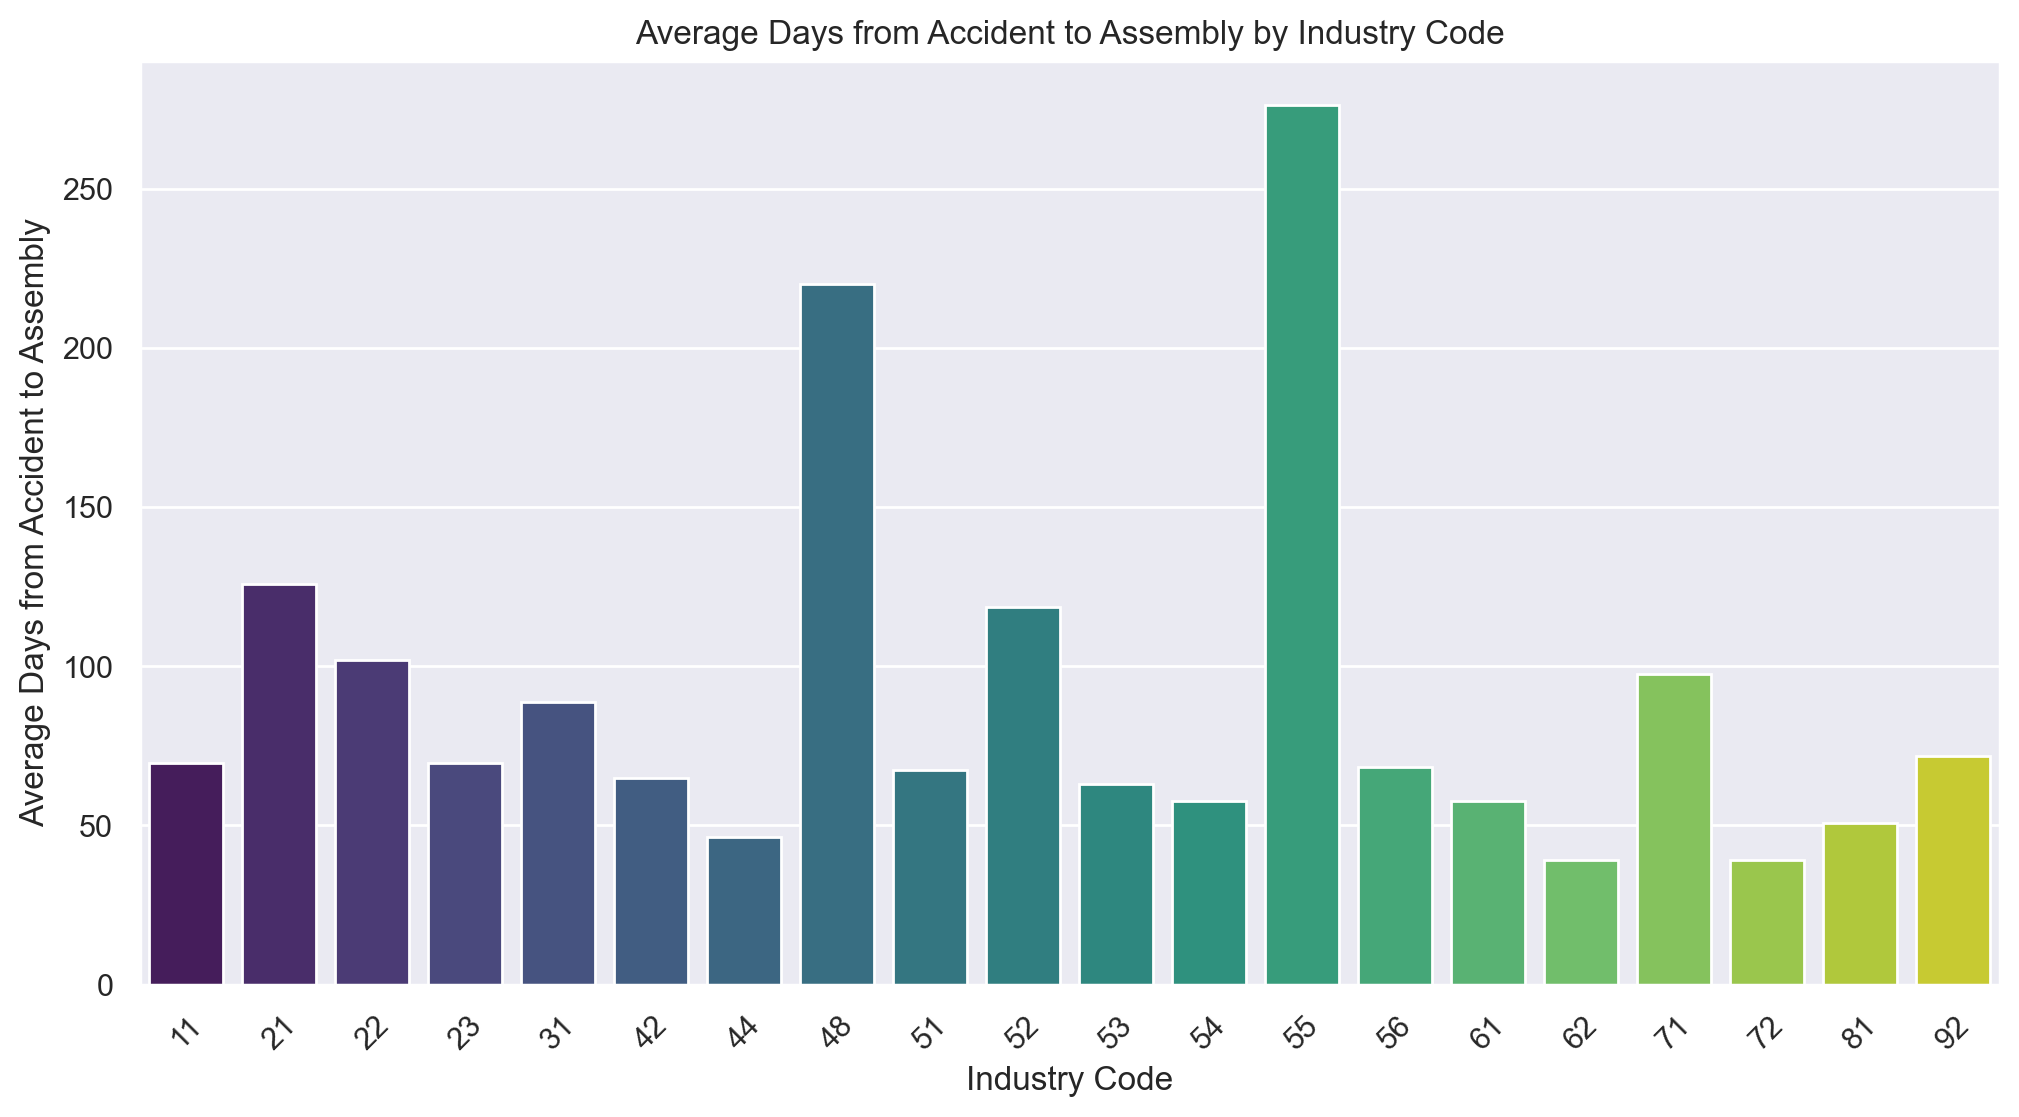

In [186]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_industry = train_data_copy.groupby('Industry Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Industry Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Industry Code')
plt.xticks(rotation=45)
plt.show()


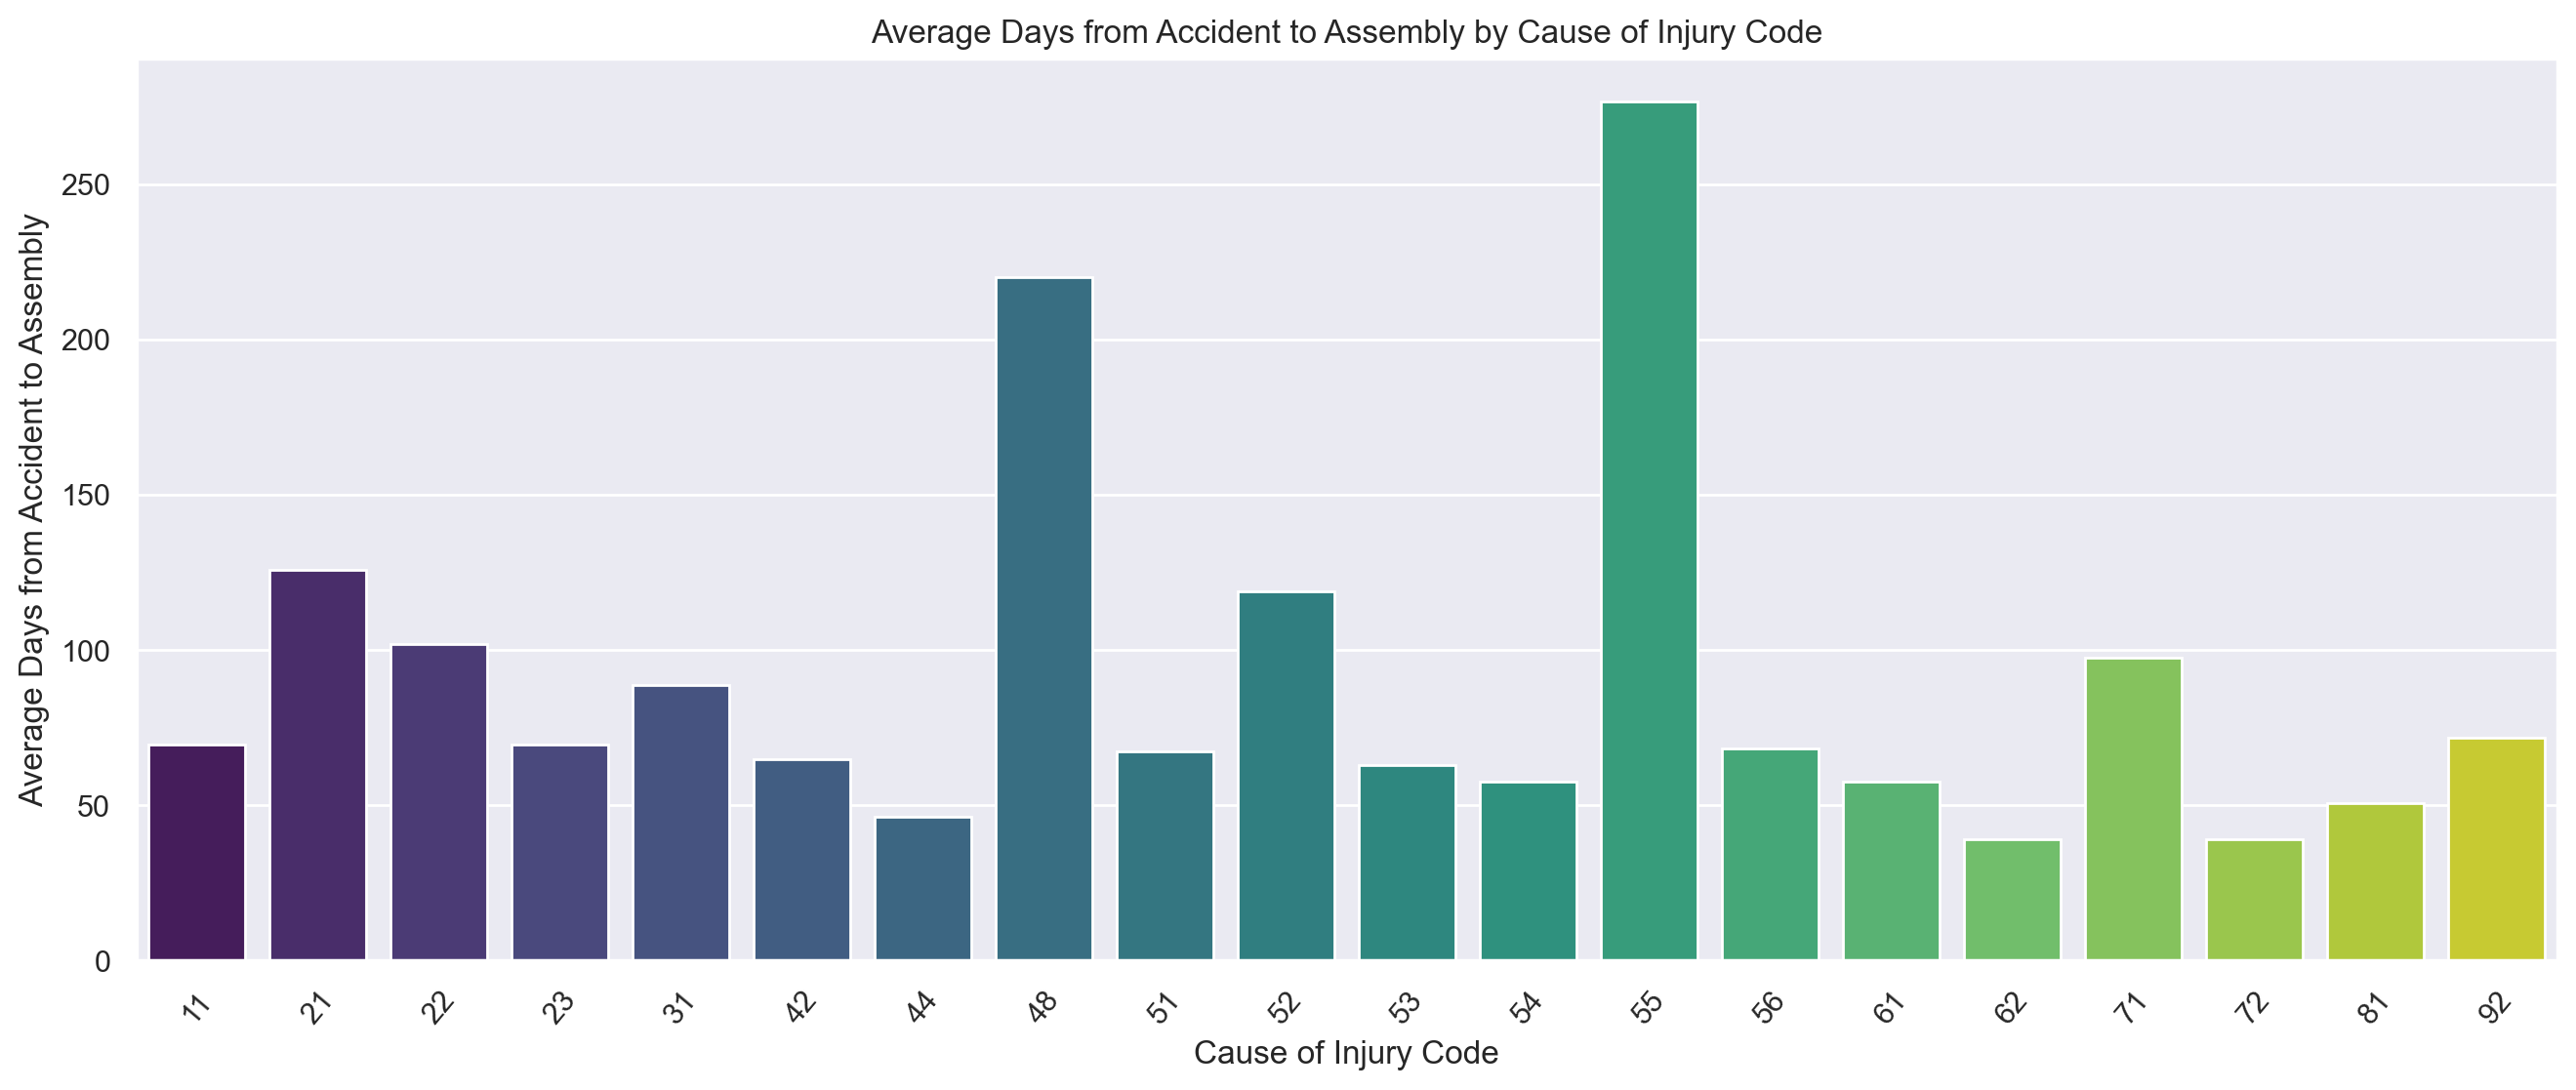

In [187]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_injury = train_data_copy.groupby('WCIO Cause of Injury Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Cause of Injury Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Cause of Injury Code')
plt.xticks(rotation=50)
plt.show()

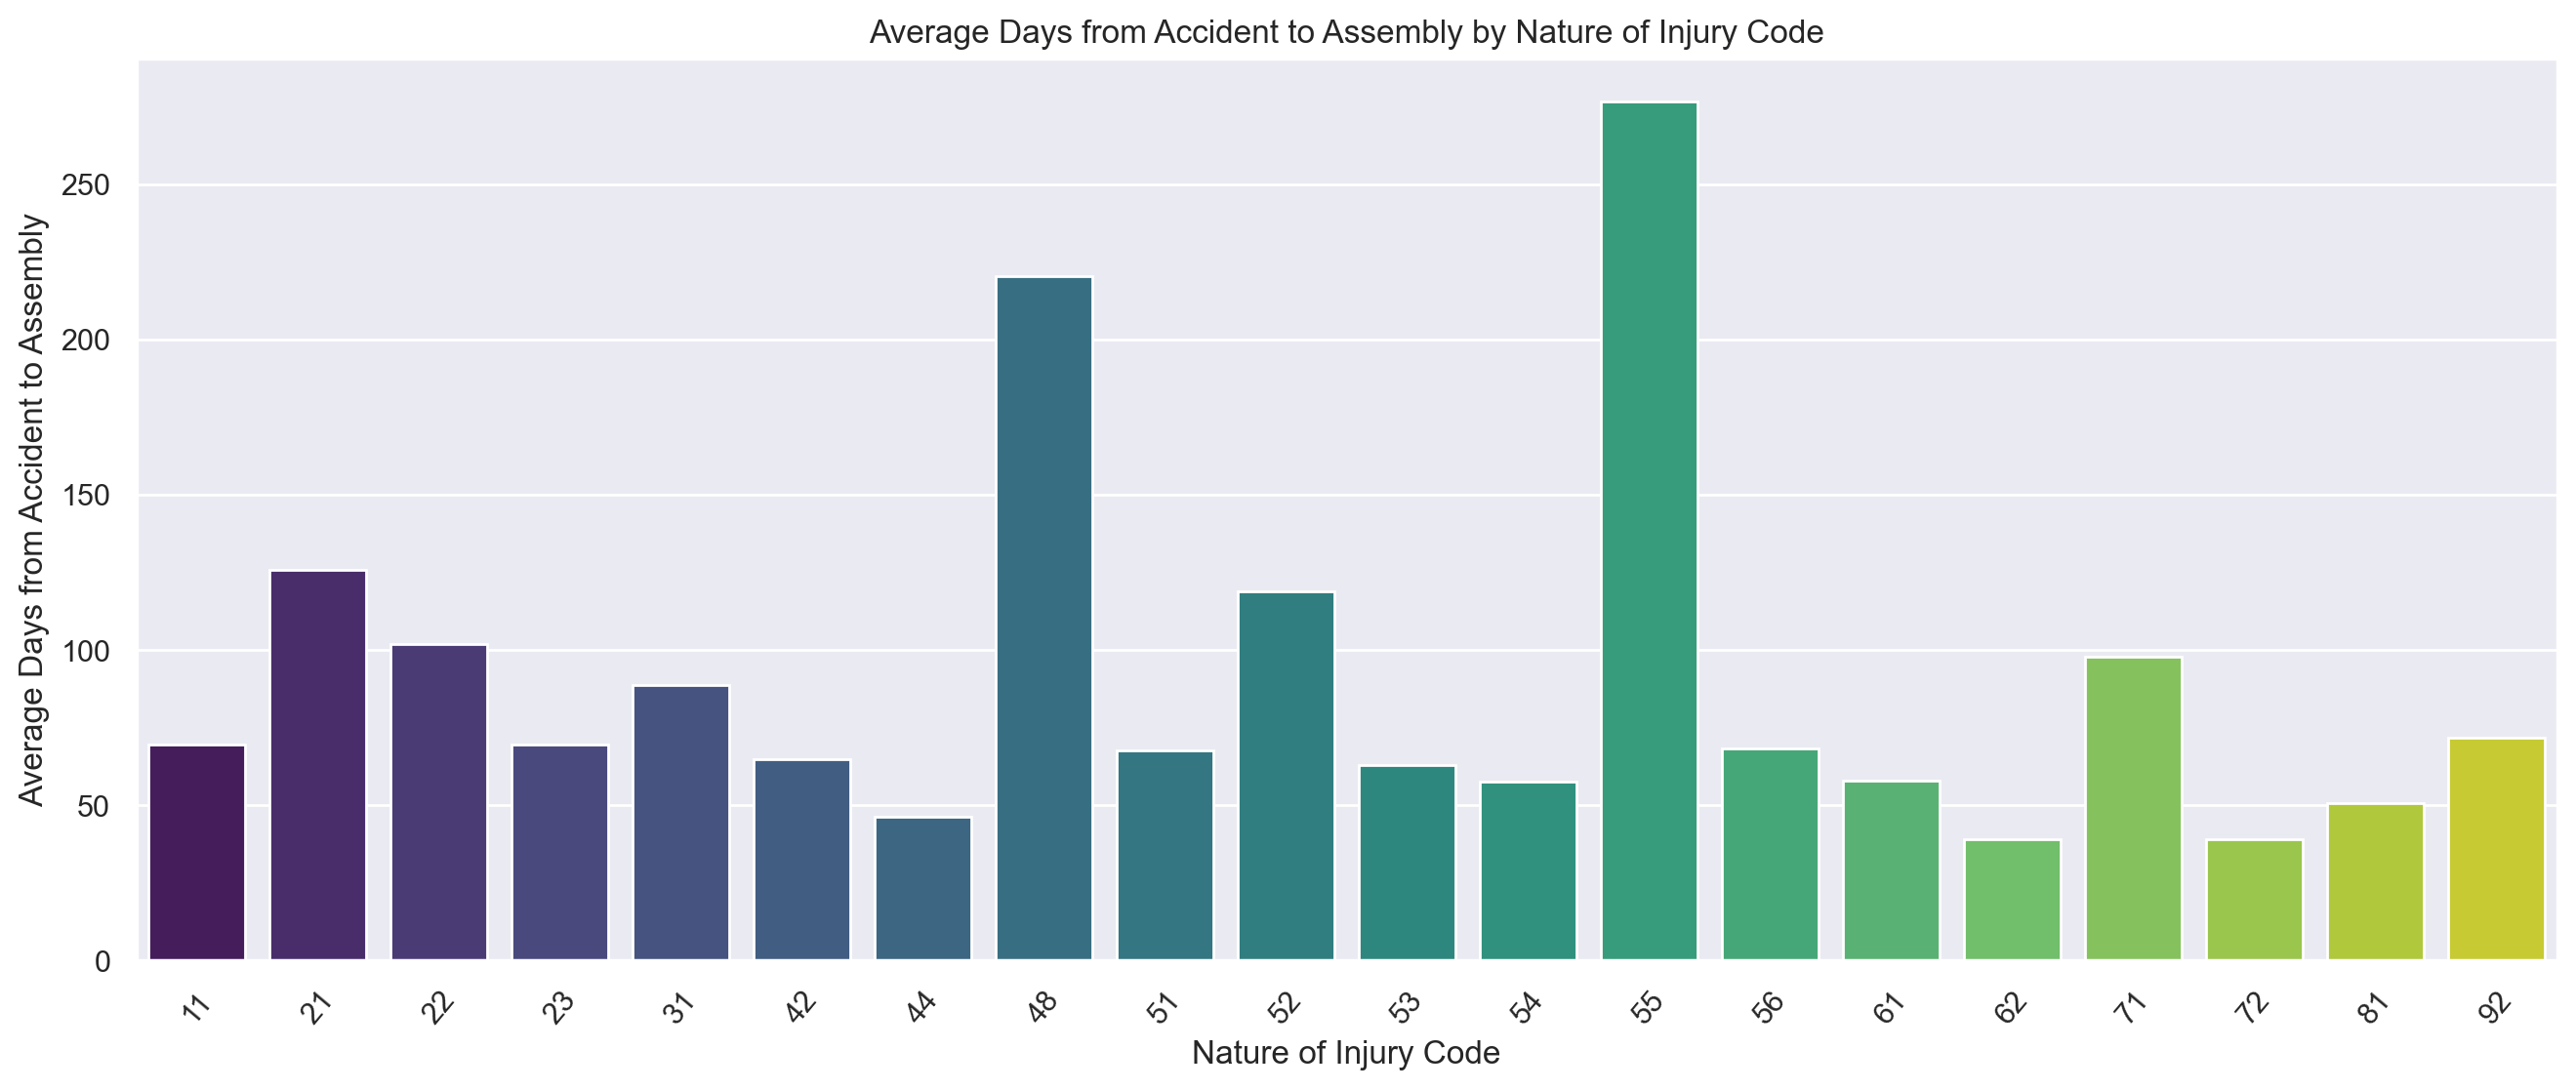

In [188]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_injury = train_data_copy.groupby('WCIO Nature of Injury Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Nature of Injury Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Nature of Injury Code')
plt.xticks(rotation=50)
plt.show()

## 2.8 Data Split & Scaling <a name="28-data-scaling"></a>




`Step 1` Split, by isolating the target variable

In [192]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [270]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  shuffle = True)

`Step 2` Define numerical and categorical data

In [195]:
train_data.dtypes

Accident Date                        datetime64[ns]
Age at Injury                                 Int64
Alternative Dispute Resolution                Int64
Assembly Date                        datetime64[ns]
Attorney/Representative                       Int64
Average Weekly Wage                         float64
Birth Year                                    Int64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                  Int64
Claim Injury Type                             Int64
County of Injury                             object
COVID-19 Indicator                            Int64
District Name                                object
Gender                                        Int64
IME-4 Count                                   Int64
Industry Code                                 Int64
Industry Code Description                    object
Medical Fee 

In [196]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

Int64             17
object             9
datetime64[ns]     4
float64            1
Name: count, dtype: int64

In [197]:
# Select only numerical columns
X_train_num = train_data.select_dtypes(include=[np.number])
X_train_num = train_data.drop('Claim Identifier', axis=1, errors='ignore')

X_train_cat = X_train.select_dtypes(include='object')


#validation
X_val_num = X_val.select_dtypes(include=[np.number])
X_val_num = X_val_num.drop('Claim Identifier', axis = 1, errors='ignore')

X_val_cat = X_val.select_dtypes(include='object')

In [330]:
len(X_train_num)

570337

In [332]:
len(X_train_cat)

399235

In [262]:
len(X_val_num)

171102

### Scaling

# 3. Feature Selection <a name="3-feature-selection"></a>

## 3.1 Filter Methods <a name="31-filter-methods"></a>

### 3.1.1 Univariate Variables <a name="311-univariate-variables"></a>

In [202]:
# Calculate variance for numeric columns only
variance_numeric_columns = X_train_num.select_dtypes(include='number').var()
print(variance_numeric_columns)

Age at Injury                          193.014341
Alternative Dispute Resolution           0.004524
Attorney/Representative                  0.215108
Average Weekly Wage               35499486.013865
Birth Year                          162599.524279
Carrier Type                             1.087063
Claim Injury Type                        1.265914
COVID-19 Indicator                       0.045926
Gender                                        0.0
IME-4 Count                              3.703721
Industry Code                          385.175071
Medical Fee Region                       1.790066
WCIO Cause of Injury Code               711.67453
WCIO Nature of Injury Code             483.275635
WCIO Part Of Body Code                 427.575881
WCB Decision                                  0.0
Number of Dependents                     4.003975
First Hearing                            0.193288
dtype: Float64


### Threshold 
`var < 0,15`

Drop:
- WCB Decision
- COVID-19 Indicator

In [204]:
X_train_num = X_train_num.drop(['WCB Decision', 'COVID-19 Indicator', 'Gender', 'Alternative Dispute Resolution'], axis=1)

,Accident Date,Age at Injury,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,District Name,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,First Hearing
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,2020-01-01,0,0.00000,1988,2019-12-31,2020-01-26,NEW HAMPSHIRE INSURANCE CO,1,2,ST. LAWRENCE,SYRACUSE,0,44,RETAIL TRADE,1,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0.0,1,0
5393091,2019-08-30,46,2020-01-01,1,1745.93000,1973,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1,4,WYOMING,ROCHESTER,4,23,CONSTRUCTION,1,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1.0,4,1
5393889,2019-12-06,40,2020-01-01,0,1434.80000,1979,2020-01-01,2020-01-02,INDEMNITY INSURANCE CO OF,1,4,ORANGE,ALBANY,0,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,2,79,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0.0,6,0
5393887,2019-12-30,61,2020-01-01,0,417.07858,1958,2019-12-31,2020-01-26,STATE INSURANCE FUND,2,2,DUTCHESS,ALBANY,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,2,16,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0.0,1,0
5393863,2019-12-26,67,2020-01-01,0,0.00000,1952,2019-12-31,2020-01-22,INDEMNITY INS. OF N AMERICA,1,3,SUFFOLK,HAUPPAUGE,0,44,RETAIL TRADE,4,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35,2022-12-30,0,0.00000,1987,2022-12-30,2023-01-10,STATE INSURANCE FUND,2,2,BRONX,NYC,0,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,4,45,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10,CONTUSION,42,LOWER BACK AREA,10467,0.0,4,0
6165285,2022-12-15,33,2022-12-31,0,0.00000,1989,2022-12-31,2023-01-11,WESCO INSURANCE CO,1,2,NASSAU,NYC,0,62,HEALTH CARE AND SOCIAL ASSISTANCE,4,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",37,INFLAMMATION,35,HAND,11590,0.0,6,0
6165506,2022-12-13,61,2022-12-31,0,991.08000,1961,2022-12-31,2023-01-09,SECURITY NATIONAL INSURANCE CO,1,4,ERIE,BUFFALO,1,62,HEALTH CARE AND SOCIAL ASSISTANCE,2,98,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",34,WRIST,14227,0.0,3,0


### 3.1.2 Correlation Indices <a name="312-correlation-indices"></a>

**Correlation Heatmap**

In [207]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [208]:
# CODE HERE
cor_spearman = X_train_num.corr(method ='spearman')
cor_spearman

ValueError: could not convert string to float: 'NEW HAMPSHIRE INSURANCE CO'

### 3.1.3 Chi-Square <a name="313-chi-square"></a>

In [210]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [212]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Carrier Name is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
Agreement Reached is IMPORTANT for Prediction


## 3.2 Wrapper Methods <a name="32-wrapper-methods"></a>

### 3.2.1 RFE <a name="321-rfe"></a>

In [248]:
model = LogisticRegression()

In [250]:
# CODE HERE
rfe = RFE(estimator = model, n_features_to_select = 10)

In [252]:
# CODE HERE
X_rfe = rfe.fit_transform(X = X_train_num, y = y_train)

ValueError: Found input variables with inconsistent numbers of samples: [570337, 399235]

In [242]:
# CODE HERE
X_train_num.columns

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'District Name', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'First Hearing'],
      dtype='object')

In [244]:
rfe.support_

AttributeError: 'RFE' object has no attribute 'support_'

In [ ]:
rfe.ranking_

## 3.3 Embedded Methods <a name="33-embedded-methods"></a>

### 3.3.1 Lasso <a name="331-lasso"></a>

In [306]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [300]:
reg = LassoCV()

In [309]:
reg.fit(X_train_num, y_train)

TypeError: Cannot cast DatetimeArray to dtype float64

In [311]:
coef = pd.Series(reg.coef_, index = X_train_num.columns)
coef

AttributeError: 'LassoCV' object has no attribute 'coef_'

## 3.4 Final Insights <a name="34-final-insights"></a>

# 4. Final Predictions

In [ ]:
test 